# ЗАНЯТИЕ 2

Цель занятия 2. Ознакомление с методом простейшего корреляционного анализа как со способом анализа и классификации цифровых
изображений. 

# 1.  
Оценить возможности простейшего корреляционного анализа
изображений для задачи классификации изображений арабских цифр
в десятичной системе счисления:

а)  подготовить набор эталонов – изображений арабских цифр в десятичной системе счисления. Размер всех изображений Nп × Nп одинаков. Значение Nп уточнить у преподавателя. Изображение представляет
собой Черный символ цифры на Белом фоне. Символ цифры должен занимать как можно большую площадь на изображении. Одна цифра
должна быть представлена одним изображением-эталоном;

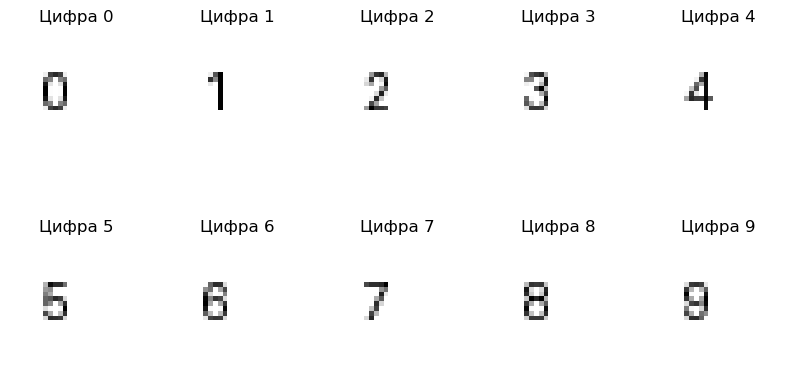

In [10]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

# Размер изображения
N_p = 28

# Создание эталонных изображений
digits = list(range(10))
font = ImageFont.load_default()

for digit in digits:
    img = Image.new('L', (N_p, N_p), color=255)  # Белый фон
    draw = ImageDraw.Draw(img)
    draw.text((N_p//4, N_p//4), str(digit), font=font, fill=0)  # Черный текст
    img.save(f"digit_{digit}.png")

# Вывод эталонных изображений
plt.figure(figsize=(10, 5))
for i, digit in enumerate(digits):
    plt.subplot(2, 5, i+1)
    plt.imshow(Image.open(f"digit_{digit}.png"), cmap='gray')
    plt.title(f"Цифра {digit}")
    plt.axis('off')
plt.show()


б)  сформировать набор входных изображений в том же формате, что
и эталон. Количество входных изображений произвольное. Подготовить
входные изображения так, чтобы их формат и содержание могли эффективно сравниваться с эталонными. Символы должны занимать одинаковую площадь на изображении, быть одинаковым образом ориентированы
в пространстве изображения и приведены к единой цветовой шкале;

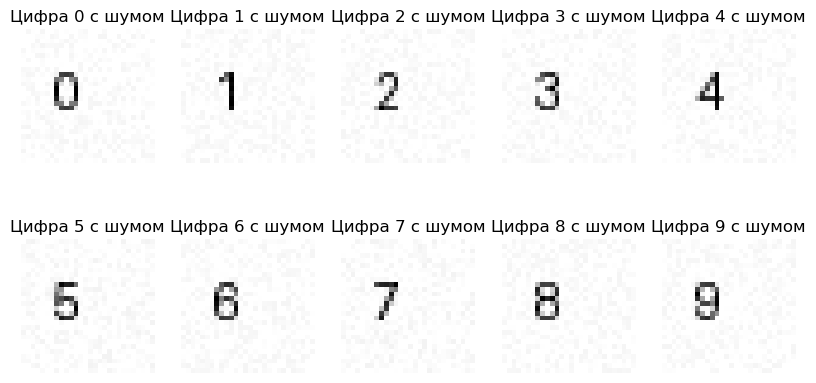

In [11]:
import random

def add_noise(image, noise_level=10):
    img_array = np.array(image)
    noise = np.random.randint(-noise_level, noise_level, img_array.shape)
    img_array = np.clip(img_array + noise, 0, 255)
    return Image.fromarray(img_array.astype('uint8'))

# Создание входных изображений
for digit in digits:
    img = Image.open(f"digit_{digit}.png")
    img = add_noise(img)
    img.save(f"input_digit_{digit}.png")

# Вывод входных изображений
plt.figure(figsize=(10, 5))
for i, digit in enumerate(digits):
    plt.subplot(2, 5, i+1)
    plt.imshow(Image.open(f"input_digit_{digit}.png"), cmap='gray')
    plt.title(f"Цифра {digit} с шумом")
    plt.axis('off')
plt.show()


в)  ознакомиться с различиями в представлениях цифровых изображений в виде массивов данных для различных форматов («*.jpg», «*.tif»
и др.); 

# Формат *.png предпочтителен для анализа, так как он не теряет качество изображения при сохранении.

г)  рассчитать коэффициенты взаимной корреляции каждого из
входных изображений с каждым из изображений-эталонов. Расчеты
проводить только для яркостных составляющих изображений; 

In [12]:
from scipy.stats import pearsonr

def calculate_pearson_correlation(img1, img2):
    img1_array = np.array(img1).flatten().astype(float)
    img2_array = np.array(img2).flatten().astype(float)
    corr, _ = pearsonr(img1_array, img2_array)
    return corr

# Пример
input_img = Image.open("input_digit_0.png")
reference_img = Image.open("digit_0.png")
correlation = calculate_pearson_correlation(input_img, reference_img)
print(f"Коэффициент корреляции Пирсона: {correlation}")



Коэффициент корреляции Пирсона: 0.9932622541010718


д)  выбрать и вывести на экран три класса, которые наиболее соответствуют входному изображению; 

In [13]:
def find_top_matches(input_img, reference_digits):
    correlations = []
    for digit in reference_digits:
        reference_img = Image.open(f"digit_{digit}.png")
        corr = calculate_correlation(input_img, reference_img)
        correlations.append((digit, corr))
    correlations.sort(key=lambda x: x[1], reverse=True)
    return [x[0] for x in correlations[:3]]

# Пример
input_img = Image.open("input_digit_0.png")
top_matches = find_top_matches(input_img, digits)
print(f"Три наиболее подходящих класса: {top_matches}")


Три наиболее подходящих класса: [0, 1, 3]


е)  сделать вывод о статистической значимости полученных значений коэффициентов взаимной корреляции, о недостатках реализованного метода классификации изображений.

Корреляционный анализ прост в реализации, но имеет недостатки:

Чувствителен к шуму и искажениям.
Не учитывает сложные особенности изображений.
Может быть недостаточно точным для сложных задач классификации.

# 2.  
Применить МНК или ансамблевые методы для повышения точности анализа и классификации изображений:

а)  расширить набор эталонов и входных изображений, соответствующих произвольно выбранному классу – цифре с 1 до нескольких изображений (рекомендуется больше 10). Выполнить последующие шаги б)
или в) в зависимости от выбранного метода;

Создадим больше эталонных и входных изображений для одной цифры (например, цифры 5).

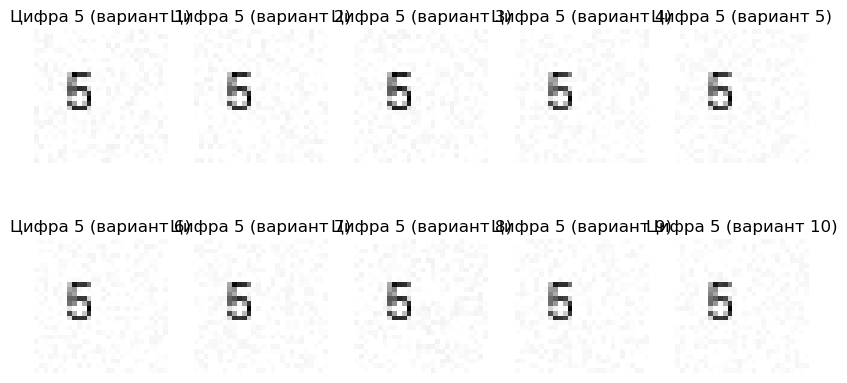

In [14]:
for i in range(10):
    img = Image.new('L', (N_p, N_p), color=255)
    draw = ImageDraw.Draw(img)
    draw.text((N_p//4, N_p//4), '5', font=font, fill=0)
    img = add_noise(img)
    img.save(f"input_digit_5_{i}.png")

# Вывод входных изображений
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(Image.open(f"input_digit_5_{i}.png"), cmap='gray')
    plt.title(f"Цифра 5 (вариант {i+1})")
    plt.axis('off')
plt.show()


б)  применить метод МНК для построения регрессионной модели,
соответствующей выбранному классу по выборке эталонов. Допускается преобразование изображений из двумерного в одномерный формат; 

In [15]:
from sklearn.linear_model import LinearRegression

# Подготовка данных
X = []
y = []
for i in range(10):
    img = Image.open(f"input_digit_5_{i}.png")
    img_array = np.array(img).flatten()
    X.append(img_array)
    y.append(5)  # Метка класса

X = np.array(X)
y = np.array(y)

# Обучение модели
model = LinearRegression()
model.fit(X, y)

# Предсказание
prediction = model.predict([X[0]])
print(f"Предсказание модели: {prediction}")


Предсказание модели: [5.]


в)  применить любой из доступных ансамблевых методов для улучшения показателей модели, полученной в пункте 1; 


Используем метод случайного леса для улучшения классификации.

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели
model = RandomForestClassifier()
model.fit(X, y)

# Предсказание
prediction = model.predict([X[0]])
print(f"Предсказание модели: {prediction}")


Предсказание модели: [5]


г)  оценить основные показатели качества МНК или ансамблевого
метода. Сделать вывод о возможности применения МНК или ансамблевых методов в задачах анализа и классификации изображений

1)МНК подходит для простых задач, но не учитывает сложные зависимости.
2)Ансамблевые методы (например, случайный лес) более устойчивы к шуму и могут улучшить точность классификации.


Вывод: Для повышения точности классификации лучше использовать ансамблевые методы, такие как случайный лес.